**Part A, part 2** 
Cancer subtype classifying 

In [45]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

from sklearn import preprocessing, datasets, metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_validate, train_test_split, cross_val_predict
from sklearn.metrics import make_scorer, confusion_matrix, f1_score, accuracy_score
#from sklearn.metrics import confusion_matrix

from sklearn.pipeline import make_pipeline

#random forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#naive bayes 
from sklearn.naive_bayes import MultinomialNB

#Support Vector Classifier (SVC) 
from sklearn.svm import SVC

#feature selection 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

#Keras
from keras.models import Sequential 
from keras.layers import Dense

import tensorflow as tf 

#import in my functions from the prior notebook 
#from ipynb.fs.full.HW3_Jade_PartA_1 import my_ML_models, my_keras
#this was my bad in how I wrote these
#they import in with the full print outs 
#I'm just copying the functions over 
#sorry about that 

This set of questions is very similar to before, but this time we are classifying tumor types as opposed to binary tissue types (normal/tumor). I created this code on the full dataset on Sunday, November 7th and had not realized there was a way to get the coding specific genes without a separate dataset. That was a mistake on my part on undestanding the data. I'm going to keep this analysis on the full dataset as we saw that there wasn't much difference between the coding and all gene data in the prior section, except for the feature selection. 

We will follow the same analysis plan - test some classical machine learning techniques, feature selection, and then deep learning with keras. 

In [2]:
type_df = pd.read_csv("MLiB-Lab3-PartA/type.all.csv")

In [ ]:
#easy to load and use this big dataset later
type_df.to_pickle("./cancer_types.pkl")

In [ ]:
type_df = pd.read_pickle("./cancer_types.pkl")

In [3]:
type_df.shape

(5400, 60484)

In [34]:
type_df.Type.unique()

array([16, 12,  5,  7, 17, 10,  6, 13,  2,  1, 18, 15,  3,  4,  9, 11, 14,
        8])

In [13]:
type_df.head()

,Type,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,...,ENSGR0000263980.4,ENSGR0000264510.4,ENSGR0000264819.4,ENSGR0000265658.4,ENSGR0000270726.4,ENSGR0000275287.3,ENSGR0000276543.3,ENSGR0000277120.3,ENSGR0000280767.1,ENSGR0000281849.1
0,16,19.0,11.7,19.1,17.1,15.5,16.0,18.3,18.9,16.3,...,0,0,0,0,0,0,0,0,0,0
1,12,16.5,0.0,21.3,15.5,14.9,17.4,17.6,20.1,17.7,...,0,0,0,0,0,0,0,0,0,0
2,5,19.8,9.7,20.4,16.4,14.2,13.9,21.5,20.0,18.7,...,0,0,0,0,0,0,0,0,0,0
3,7,16.7,0.0,19.3,15.9,16.1,16.8,16.2,19.2,18.6,...,0,0,0,0,0,0,0,0,0,0
4,16,16.4,10.2,19.3,15.5,15.0,15.6,17.3,18.7,17.4,...,0,0,0,0,0,0,0,0,0,0


In [46]:
type_y = type_df["Type"]
type_x = type_df.drop(columns = ["Type"])

In [55]:
#redefine classic ML function 
#this is the same as last time, I just had difficulties cleaning importing it 
#Define machine learning function so I can easily run this for the full N/T dataset and the Type problem in Part A, 2

def my_ML_models(x_df, y_df, ml_model):
    """
    Inputs:
        x_df: dataframe with gene expression values 
        y_df: dataframe with desired outcome (tumor status, type)
        ml_model: string with classic ML technique 
        current options: "Random Forest", "Naive Bayes", "SVC"
    
    Returns: 
        None
        Only prints various model performance statistics
    
    """
    
    if ml_model == "Random Forest": 
        pipe = make_pipeline(StandardScaler(), RandomForestClassifier())
    
    elif ml_model == "Naive Bayes": 
        #need min/max scaler since NB can't handle negative values 
        pipe = make_pipeline(MinMaxScaler(), MultinomialNB())
    
    elif ml_model == "SVC":
        pipe = make_pipeline(StandardScaler(), SVC(gamma = "auto"))
        
    else: 
        print("I haven't defined that model yet")
        print("Only Random Forest, Naive Bayes, and SVC supported now")
    
    
    #predict y using the ML method above with 5-fold cross validation
    y_pred = cross_val_predict(pipe, x_df, y_df, cv = 5)
    
    #can just print metrics since we don't use them later 
    #update this if want more functionality 

    #confusion matrix
    print("Confusion Matrix: ", confusion_matrix(y_df, y_pred))

    #f1 scores 
    print("F1 Score", f1_score(y_df, y_pred, average = None))

    #Accuracy 
    print("Accuracy", accuracy_score(y_df, y_pred))
    

In [56]:
#Random forest on all type data 
my_ML_models(type_x, type_y, "Random Forest")

#again this performs great on both metrics 

Confusion Matrix:  [[300   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 274   0   0   0   0  10   0   0   1   1   0   0   1   0   1  12   0]
 [  0   0 288  11   0   0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   9 287   0   0   0   0   0   0   4   0   0   0   0   0   0   0]
 [  0   0   0   1 296   0   0   0   0   2   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0 287  11   0   0   0   0   0   0   0   0   1   0   1]
 [  0   5   0   0   1  46 240   0   0   0   2   0   0   0   0   4   2   0]
 [  0   0   0   0   0   0   0 299   0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 298   0   0   0   1   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0 299   0   0   0   0   0   0   1   0]
 [  0  13   0   0   0   0   4   0   0   2 273   0   0   0   0   2   6   0]
 [  0   0   0   0   0   0   0   1   0   0   0 299   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 300   0   0   0   0   0]
 [  0 

Again, random forest performs very well on this classification problem. Its overall accuracy is 96% and it reaches even higher true positive rates for particular types. We might want to develop other models to improve the accuracy on some of the types, for example tumor type 7 only has an 85% true positive rate. Perhaps another model does a better job at identifying this type of tumor. 

In [57]:
#Naive Bayes on gene coding data
my_ML_models(type_x, type_y, "Naive Bayes")


Confusion Matrix:  [[296   0   0   0   0   0   0   0   0   0   0   4   0   0   0   0   0   0]
 [  0 252   0   0   0   0  22   0   0   0   0   7   0   0   0   2  17   0]
 [  0   0 235  47   1   1   0   0   0   1   0  14   0   1   0   0   0   0]
 [  0   0  19 267   0   0   2   0   0   0   5   7   0   0   0   0   0   0]
 [  0   0   2   3 288   2   3   0   0   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 267  19   0   0   0   1   8   0   0   0   2   2   1]
 [  0  10   0   0   0  41 243   0   0   0   1   0   0   0   0   2   3   0]
 [  0   0   0   0   0   0   0 299   0   0   0   0   0   0   0   0   1   0]
 [  0   0   0   0   0   1   0   0 291   0   0   7   0   1   0   0   0   0]
 [  0   2   0   0   0   1   1   0   0 293   0   2   0   0   0   1   0   0]
 [  0  19   0   0   0   1  14   0   1   0 241   5   0   3   0   1  15   0]
 [  0   1   0   0   0   7   0  10   0   0   0 264   0   0   0   0   0  18]
 [  0   0   1   0   0   1   0   0   0   0   0   1 295   2   0   0   0   0]
 [  0 

Naive Bayes also performs very well with an overall accuracy of 91%, but there's a spread in how well it predicts true positives depending on the cancer types. We might choose a different model for these types or need to do more data preparation to adjust for imbalances. 

I was trying to use SVC here too, but it was timing out. I'm not sure why this is happening and would need to look more into the formulas and dataset to identify this issue. Since the other models are performing so well, I will use these instead. 

*Feature Selection* 

The F-test is also taking way too long with this big of a dataset and 18 different classes. Instead, I chose a trees approach here since this should be faster. Given how well the random forests have been working as classifiers, I think it should also do well as a dimension reducer. 

In [58]:
#Random forest performs the best and fastest, use this classifier
#top 100 features 
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100), max_features = 100)
sel.fit(type_x, type_y)
selected_feat= type_x.columns[(sel.get_support())]
selected_feat

Index(['ENSG00000021852.11', 'ENSG00000042832.10', 'ENSG00000065361.13',
       'ENSG00000066813.13', 'ENSG00000074527.10', 'ENSG00000079112.8',
       'ENSG00000086205.15', 'ENSG00000091513.13', 'ENSG00000100557.8',
       'ENSG00000104154.6', 'ENSG00000104447.10', 'ENSG00000107485.14',
       'ENSG00000108405.3', 'ENSG00000109072.12', 'ENSG00000120215.8',
       'ENSG00000124564.16', 'ENSG00000124900.11', 'ENSG00000125257.12',
       'ENSG00000125618.15', 'ENSG00000132688.10', 'ENSG00000134871.16',
       'ENSG00000136881.10', 'ENSG00000136944.16', 'ENSG00000138079.12',
       'ENSG00000139194.6', 'ENSG00000140093.8', 'ENSG00000141738.12',
       'ENSG00000142515.13', 'ENSG00000143921.6', 'ENSG00000143995.18',
       'ENSG00000146005.3', 'ENSG00000147676.12', 'ENSG00000148513.16',
       'ENSG00000149742.8', 'ENSG00000150556.15', 'ENSG00000150625.15',
       'ENSG00000152804.9', 'ENSG00000153822.12', 'ENSG00000157103.9',
       'ENSG00000158715.5', 'ENSG00000162267.11', 'ENSG00000163

*Keras* 

I tried running Keras on both the full gene dataset and the top 100 features. It performed much better with the top 100 features dataset, I'm thinking because it doesn't learn as much of the noise and redundant gene data. Keras on the top 100 features followed by full dataset. 

In [64]:
top_df = type_df[selected_feat]

top_x = type_df.drop(columns = ["Type"])
top_y = type_df["Type"]

#change labels to be 0 - 17 instead 
top_y = top_y -1 

#scale the x's 
top_max = max(np.max(top_x))
top_x = top_x/top_max

Epoch 1/10
135/135 [==============================] - 8s 60ms/step - loss: 2.6754 - accuracy: 0.2023 - val_loss: 1.9591 - val_accuracy: 0.2907
Epoch 2/10
135/135 [==============================] - 3s 25ms/step - loss: 1.6833 - accuracy: 0.3688 - val_loss: 1.4796 - val_accuracy: 0.4333
Epoch 3/10
135/135 [==============================] - 3s 21ms/step - loss: 0.9984 - accuracy: 0.6831 - val_loss: 0.7528 - val_accuracy: 0.8074
Epoch 4/10
135/135 [==============================] - 3s 22ms/step - loss: 0.4909 - accuracy: 0.8921 - val_loss: 0.5295 - val_accuracy: 0.8472
Epoch 5/10
135/135 [==============================] - 3s 21ms/step - loss: 0.3361 - accuracy: 0.9275 - val_loss: 0.6072 - val_accuracy: 0.8139
Epoch 6/10
135/135 [==============================] - 3s 22ms/step - loss: 0.2181 - accuracy: 0.9609 - val_loss: 0.4115 - val_accuracy: 0.8935
Epoch 7/10
135/135 [==============================] - 3s 21ms/step - loss: 0.1601 - accuracy: 0.9775 - val_loss: 0.3796 - val_accuracy: 0.9009

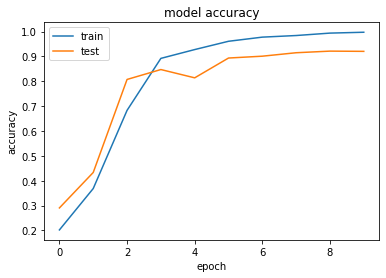

In [43]:
#keras classifier with 80/20 split

# create model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(18)
])


# Compile model
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fit the model
top_fit = model.fit(top_x, top_y, validation_split=0.20, epochs=10)


# summarize history for accuracy
plt.plot(top_fit.history['accuracy'])
plt.plot(top_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Although Keras on the top 100 features performs better than on the full dataset (below), it still doesn't outperform the random forest classifier. The final accuray is 92% while the random forest has 96%. Again, I think this could be because the deep learning model may be overfitting and it requires more hyperparameter tuning to perform optimally. 

Keras with the raw data performs very poorly as we can see below. Running it on the top features (above) is much better

In [65]:
type_x = type_df.drop(columns = ["Type"])
type_y = type_df["Type"]

#change labels to be 0 - 17 instead 
type_y = type_y -1 

#scale the x's 
type_max = max(np.max(type_x))
type_x = type_x/type_max

Epoch 1/10
135/135 [==============================] - 8s 51ms/step - loss: 3.4163 - accuracy: 0.0472 - val_loss: 2.8905 - val_accuracy: 0.0565
Epoch 2/10
135/135 [==============================] - 3s 22ms/step - loss: 2.8906 - accuracy: 0.0521 - val_loss: 2.8909 - val_accuracy: 0.0491
Epoch 3/10
135/135 [==============================] - 3s 22ms/step - loss: 2.8905 - accuracy: 0.0523 - val_loss: 2.8912 - val_accuracy: 0.0389
Epoch 4/10
135/135 [==============================] - 3s 21ms/step - loss: 2.8904 - accuracy: 0.0576 - val_loss: 2.8916 - val_accuracy: 0.0389
Epoch 5/10
135/135 [==============================] - 3s 22ms/step - loss: 2.8903 - accuracy: 0.0597 - val_loss: 2.8921 - val_accuracy: 0.0389
Epoch 6/10
135/135 [==============================] - 3s 22ms/step - loss: 2.8904 - accuracy: 0.0560 - val_loss: 2.8924 - val_accuracy: 0.0389
Epoch 7/10
135/135 [==============================] - 3s 22ms/step - loss: 2.8903 - accuracy: 0.0597 - val_loss: 2.8927 - val_accuracy: 0.0389

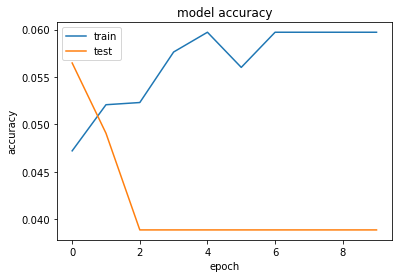

In [66]:
#keras classifier with 80/20 split

# create model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(18)
])


# Compile model
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fit the model
type_fit = model.fit(type_x, type_y, validation_split=0.20, epochs=10)


# summarize history for accuracy
plt.plot(type_fit.history['accuracy'])
plt.plot(type_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


*Conclusion* 

The classical machine learning techniques still do a better job at classifying tumor type, particularly random forests. There's variation in how well the model classifies depending on type, this may indicate that we need to develop separate models or fix data imbalances. Overall, there's a lot of meaningful information that can be extracted from gene expression data to classify tumor type and machine learning techniques can assist in this process. We still need to work towards perfecting these models before they could be used to identify patient's tumor types in a useful clinical application. 

*Extra Credit AutoKeras Pseudocode*

I was having difficulties downloading autokeras. This requires me to set up a virtual environment to run with a downgraded python version. I would love to do this with more time in the future, but I'm just going to leave this here to demonstrate my thought process about this. I'm very interested in the idea of being able to automate the deep learning optimization.  


In [ ]:
#autokeras - having difficulties importing
#import autokeras as ak

In [ ]:
#from their tutorial: https://autokeras.com/tutorial/structured_data_classification/

# Initialize the structured data classifier.
clf = ak.StructuredDataClassifier(
    overwrite=True, max_trials=3
)  # It tries 3 different models.


# Feed the structured data classifier with training data.
clf.fit(train_type_x, 
        train_type_y,
        epochs=10)

# Predict with the best model.
predicted_y = clf.predict(test_type_x)

# Evaluate the best model with testing data.
print(clf.evaluate(test_type_x, test_type_y))